In [12]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import random
import os
import math


In [13]:
Image_Width=64
Image_Height=64
Image_Size=(Image_Width,Image_Height)
Image_Channels=3
type(Image_Size)

tuple

In [14]:
filenames=os.listdir("./train")

categories=[]
for f_name in filenames:
    #save .jpg, take both element number and jpg then take first element so its number.
    #then compare dog or cat, so make label to 0 or 1
    category=f_name.split('.')[0] 
    #dog represent 1, cat represent 0
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [15]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [16]:
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


In [17]:
df['category'] = df['category'].replace({0:'cat', 1: 'dog'})
df['category']

0        cat
1        cat
2        cat
3        cat
4        cat
        ... 
24995    dog
24996    dog
24997    dog
24998    dog
24999    dog
Name: category, Length: 25000, dtype: object

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
  optimizer='adam',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

## Test Train Split

In [27]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=32

,filename,category
0,dog.8479.jpg,dog
1,dog.876.jpg,dog
2,cat.10915.jpg,cat
3,dog.10127.jpg,dog
4,cat.11377.jpg,cat
...,...,...
19995,dog.6916.jpg,dog
19996,cat.36.jpg,cat
19997,cat.10771.jpg,cat
19998,dog.1713.jpg,dog


In [30]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.1)
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    "./train/",x_col='filename',y_col='category',
                                                    batch_size=batch_size,
                                                    class_mode = 'binary',
                                                    target_size = Image_Size
                                                   )
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(validate_df, 
                                                              "./train/", 
                                                              x_col='filename',
                                                              y_col='category',
                                                              target_size=Image_Size,
                                                              class_mode='binary',
                                                              batch_size=batch_size
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_dataframe(train_df,
                                                "./test1/",x_col='filename',y_col='category',
                                                target_size=Image_Size,
                                                class_mode='binary',
                                                batch_size=batch_size,
                                                shuffle = False)

                               

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 0 classes.


F:\ProgramFiles\Anaconda2\envs\deeplearning\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:270: UserWarning: Found 20000 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [33]:
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    #callbacks=callbacks
)

Epoch 1/10
625/625 [==============================] - 117s 187ms/step - loss: 0.4472 - accuracy: 0.7894 - val_loss: 0.4634 - val_accuracy: 0.7788
Epoch 2/10
625/625 [==============================] - 115s 185ms/step - loss: 0.4178 - accuracy: 0.8062 - val_loss: 0.4667 - val_accuracy: 0.7808
Epoch 3/10
625/625 [==============================] - 117s 187ms/step - loss: 0.3869 - accuracy: 0.8268 - val_loss: 0.4617 - val_accuracy: 0.7857
Epoch 4/10
625/625 [==============================] - 130s 208ms/step - loss: 0.3569 - accuracy: 0.8411 - val_loss: 0.4818 - val_accuracy: 0.7853
Epoch 5/10
625/625 [==============================] - 153s 245ms/step - loss: 0.3200 - accuracy: 0.8609 - val_loss: 0.4724 - val_accuracy: 0.7909
Epoch 6/10
625/625 [==============================] - 155s 248ms/step - loss: 0.2819 - accuracy: 0.8800 - val_loss: 0.4682 - val_accuracy: 0.8015
Epoch 7/10
625/625 [==============================] - 156s 250ms/step - loss: 0.2447 - accuracy: 0.9005 - val_loss: 0.5088 -

In [34]:
model.save("model1_catsVSdogs_10epoch.h5")

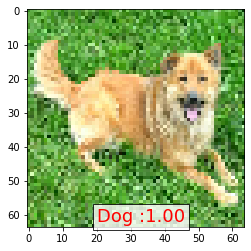

In [42]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('test/dog/4.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()